<a href="https://colab.research.google.com/github/Waleed-Azam/1D-CNN/blob/master/Herman_Data_Time_Series_Forecasting_27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Data Set training

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import numpy as np

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloaded = drive.CreateFile({'id':'1NiHiOzShPCDOKPnfNjrzjEcpvWoA8MwS'}) # replace the id with id of file you want to access'}) # replace the id with id of file you want to access

In [0]:
downloaded.GetContentFile('Training_Data_FEW_FISHES.csv')

In [0]:
import pandas as pd
df1 = pd.read_csv('Training_Data_FEW_FISHES.csv') 
df1

,Time,DVL1,DVL2,DVL3,DVL4
0,NaN,NaN,NaN,NaN,NaN
1,0.0,20.000000,20.000000,20.000000,20.000000
2,0.1,20.000000,20.000000,20.000000,20.000000
3,0.2,20.000000,20.000000,20.000000,20.000000
4,0.3,20.000000,20.000000,20.000000,20.000000
...,...,...,...,...,...
49996,4999.5,2.564325,2.547429,2.685580,2.715926
49997,4999.6,2.564293,2.547059,2.685737,2.715903
49998,4999.7,2.564267,2.546647,2.685912,2.715890
49999,4999.8,2.564253,2.546235,2.686088,2.715891


In [0]:
df1

,Time,DVL1,DVL2,DVL3,DVL4
0,NaN,NaN,NaN,NaN,NaN
1,0.0,20.000000,20.000000,20.000000,20.000000
2,0.1,20.000000,20.000000,20.000000,20.000000
3,0.2,20.000000,20.000000,20.000000,20.000000
4,0.3,20.000000,20.000000,20.000000,20.000000
...,...,...,...,...,...
49996,4999.5,2.564325,2.547429,2.685580,2.715926
49997,4999.6,2.564293,2.547059,2.685737,2.715903
49998,4999.7,2.564267,2.546647,2.685912,2.715890
49999,4999.8,2.564253,2.546235,2.686088,2.715891


In [0]:
# univariate cnn example
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

Using TensorFlow backend.


In [0]:
df1["DVL1"] = df1["DVL1"].fillna(0)

In [0]:
data_to_use=df1['DVL1'].values

In [0]:
scaled_dataset=data_to_use

In [0]:
scaled_dataset

array([ 0.      , 20.      , 20.      , ...,  2.564267,  2.564253,
        2.564248])

In [0]:
def window_data(data, window_size):
    X = []
    y = []
    
    i = 0
    while (i + window_size) <= len(data) - 1:
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
        
        i += 1
    assert len(X) ==  len(y)
    return X, y


X, y = window_data(scaled_dataset, 10)

In [0]:
X_train  = np.array(X[:45000])
y_train = np.array(y[:45000])

X_test = np.array(X[45000:])
y_test = np.array(y[45000:])

In [0]:
print("X_train size: {}".format(X_train.shape))
print("y_train size: {}".format(y_train.shape))
print("X_test size: {}".format(X_test.shape))
print("y_test size: {}".format(y_test.shape))

X_train size: (45000, 10)
y_train size: (45000,)
X_test size: (4991, 10)
y_test size: (4991,)


In [0]:
dates = df1['Time']
train_date = dates[:45000]
test_date = dates[-4991:]

In [0]:
n_steps = 10

In [0]:
X = X_train
y = y_train

n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])
# fit model
history=model.fit(X, y, epochs=10, verbose=0)

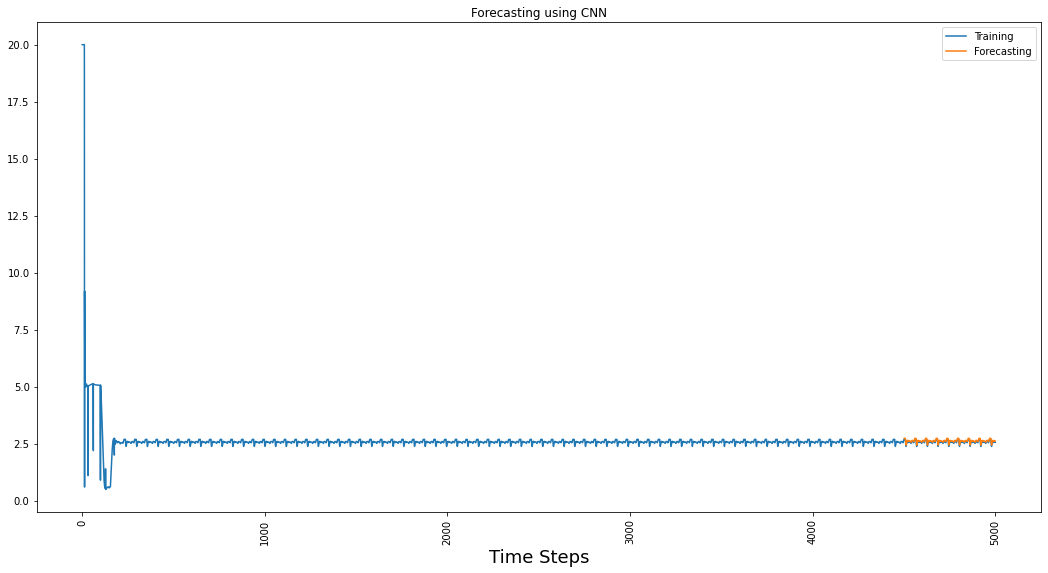

In [0]:
# demonstrate prediction
import math
y_pred=[]
for i in X_test:
    
    x_input = i
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    y_pred.append(float(yhat[0]))

# import numpy as np
# yp = list(np.around(np.array(y_pred),1))
# yt = list(np.around((y_test),1))
    
# y_pred = [ '%.1f' % elem for elem in y_pred ]
# y_test = [ '%.1f' % elem for elem in y_pred ]
    
#print(y_pred)
#print(y_test)

plt.figure(figsize = (18,9))

plt.plot(dates,scaled_dataset,label="Training")
plt.plot(test_date,y_pred,label="Forecasting")
#plt.plot(test_date,y_test,label="actual ")

plt.xticks(rotation=90)
plt.xlabel('Time Steps',fontsize=18)
plt.legend()
plt.title("Forecasting using CNN")
plt.show()

In [0]:
plt.plot(history.history['[metrics]'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Mean Square Error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

KeyError: ignored

In [0]:
Herman when we say that it is a forecasting problem, which has some rights to perform well, let say we a courrpted data and we want to estimate that with the new nice data
then we need to use a scrablemed data truely?
how to use tha data to some way?

SyntaxError: ignored

Ground truth is a term used in various fields to refer to information provided by direct observation (i.e. empirical evidence) as opposed to information provided by inference.

"Ground truth" may be seen as a conceptual term relative to the knowledge of the truth concerning a specific question. It is the ideal expected result.[2] This is used in statistical models to prove or disprove research hypotheses. The term "ground truthing" refers to the process of gathering the proper objective (provable) data for this test.

In [0]:
#The ground truth is what you measured for your target variable for the training and testing examples.

#Nearly all the time you can safely treat this the same as the label.

In [0]:
#Have a groud truth

In [0]:
# The task is to predict and do the thing using the label data and need to do stuff right away in the soft manner

In [0]:
#Computes the mean of squares of errors between labels and predictions.

In [0]:
tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")

In [0]:
import tensorflow as tf


In [0]:
>>> y_true = [[0., 1.], [0., 0.]]
>>> y_pred = [[1., 1.], [1., 0.]]
>>> # Using 'auto'/'sum_over_batch_size' reduction type.  
>>> mse = tf.keras.losses.MeanSquaredError()
>>> mse(y_true, y_pred).numpy()
0.5

0.5

In [0]:
>>> # Calling with 'sample_weight'.  
>>> mse(y_true, y_pred, sample_weight=[0.7, 0.3]).numpy()
0.25

0.25

In [0]:
#Let say I have both the data set here, in my computer. I have scrambled data and the ground truth data, both are perfect. Need to perform the following tasks.
#Feed those in to the neural network. (Then I need to have a two types of the data, which is very important to feed in to the system)
#Once feeding is done, I can move forward to the working of the new things.

In [0]:
#feeding the data to the neural network


In [0]:
df1

,Time,DVL1,DVL2,DVL3,DVL4
0,NaN,0.000000,NaN,NaN,NaN
1,0.0,20.000000,20.000000,20.000000,20.000000
2,0.1,20.000000,20.000000,20.000000,20.000000
3,0.2,20.000000,20.000000,20.000000,20.000000
4,0.3,20.000000,20.000000,20.000000,20.000000
...,...,...,...,...,...
49996,4999.5,2.564325,2.547429,2.685580,2.715926
49997,4999.6,2.564293,2.547059,2.685737,2.715903
49998,4999.7,2.564267,2.546647,2.685912,2.715890
49999,4999.8,2.564253,2.546235,2.686088,2.715891


In [0]:
# here need to add a ground truth
downloaded = drive.CreateFile({'id':'1CHTVraHduiRx56vivJ6fFV2RYnYRDnRV'}) # replace the id with id of file you want to access'})

In [0]:
downloaded.GetContentFile('Ground truth.csv')

In [0]:
import pandas as pd
df2 = pd.read_csv('Ground truth.csv') 
df2

,Time,DVL1,DVL2,DVL3,DVL4
0,NaN,NaN,NaN,NaN,NaN
1,0.0,20.000000,20.000000,20.000000,20.000000
2,0.1,20.000000,20.000000,20.000000,20.000000
3,0.2,20.000000,20.000000,20.000000,20.000000
4,0.3,20.000000,20.000000,20.000000,20.000000
...,...,...,...,...,...
49996,4999.5,2.564325,2.547429,2.685580,2.715926
49997,4999.6,2.564293,2.547059,2.685737,2.715903
49998,4999.7,2.564267,2.546647,2.685912,2.715890
49999,4999.8,2.564253,2.546235,2.686088,2.715891


In [0]:
data_to_use=df1

In [0]:
Ground_truth=df2

In [0]:
#lets consider for now that I have two different data sets, now I need to feed both in to the neural networks

Structure of the deep learning project

Before starting, I would like to give an overview of how to structure any deep learning project.
Preprocess and load data- As we have already discussed data is the key for the working of neural network and we need to process it before feeding to the neural network. In this step, we will also visualize data which will help us to gain insight into the data.
Define model- Now we need a neural network model. This means we need to specify the number of hidden layers in the neural network and their size, the input and output size.
Loss and optimizer- Now we need to define the loss function according to our task. We also need to specify the optimizer to use with learning rate and other hyperparameters of the optimizer.
Fit model- This is the training step of the neural network. Here we need to define the number of epochs for which we need to train the neural network.

In [0]:
data_to_use

,Time,DVL1,DVL2,DVL3,DVL4
0,NaN,NaN,NaN,NaN,NaN
1,0.0,20.000000,20.000000,20.000000,20.000000
2,0.1,20.000000,20.000000,20.000000,20.000000
3,0.2,20.000000,20.000000,20.000000,20.000000
4,0.3,20.000000,20.000000,20.000000,20.000000
...,...,...,...,...,...
49996,4999.5,2.564325,2.547429,2.685580,2.715926
49997,4999.6,2.564293,2.547059,2.685737,2.715903
49998,4999.7,2.564267,2.546647,2.685912,2.715890
49999,4999.8,2.564253,2.546235,2.686088,2.715891


In [0]:
data_to_use["DVL1"] = data_to_use["DVL1"].fillna(0)

In [0]:
data_to_use=data_to_use['DVL1'].values

In [0]:
scaled_dataset=data_to_use

In [0]:
scaled_dataset

array([ 0.      , 20.      , 20.      , ...,  2.564267,  2.564253,
        2.564248])

In [0]:
#Splitting the data in to the X and the y

In [0]:
def window_data(data, window_size):
    X = []
    y = []
    
    i = 0
    while (i + window_size) <= len(data) - 1:
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
        
        i += 1
    assert len(X) ==  len(y)
    return X, y


X, y = window_data(scaled_dataset, 10)

In [0]:
for features, label in scaled_dataset
   X.append(features)
   y.append(label)



In [0]:
X_train  = np.array(X[:45000])
y_train = np.array(y[:45000])

X_test = np.array(X[45000:])
y_test = np.array(y[45000:])

In [0]:
# next step is to add the data to the neural network, but again I need to add the ground truth as well here.

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential

In [0]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv1D, MaxPool1D

In [62]:
df2

,Time,DVL1,DVL2,DVL3,DVL4
0,NaN,NaN,NaN,NaN,NaN
1,0.0,20.000000,20.000000,20.000000,20.000000
2,0.1,20.000000,20.000000,20.000000,20.000000
3,0.2,20.000000,20.000000,20.000000,20.000000
4,0.3,20.000000,20.000000,20.000000,20.000000
...,...,...,...,...,...
49996,4999.5,2.564325,2.547429,2.685580,2.715926
49997,4999.6,2.564293,2.547059,2.685737,2.715903
49998,4999.7,2.564267,2.546647,2.685912,2.715890
49999,4999.8,2.564253,2.546235,2.686088,2.715891


In [63]:
df1

,Time,DVL1,DVL2,DVL3,DVL4
0,NaN,0.000000,NaN,NaN,NaN
1,0.0,20.000000,20.000000,20.000000,20.000000
2,0.1,20.000000,20.000000,20.000000,20.000000
3,0.2,20.000000,20.000000,20.000000,20.000000
4,0.3,20.000000,20.000000,20.000000,20.000000
...,...,...,...,...,...
49996,4999.5,2.564325,2.547429,2.685580,2.715926
49997,4999.6,2.564293,2.547059,2.685737,2.715903
49998,4999.7,2.564267,2.546647,2.685912,2.715890
49999,4999.8,2.564253,2.546235,2.686088,2.715891


In [64]:
data_to_use

array([ 0.      , 20.      , 20.      , ...,  2.564267,  2.564253,
        2.564248])

In [0]:
#label


In [0]:
#normalize

Summary of the LABELS AND FEATURES

A label is the thing we're predicting—the y variable in simple linear regression. The label could be the future price of wheat, the kind of animal shown in a picture, the meaning of an audio clip, or just about anything.

A feature is an input variable—the x variable in simple linear regression. A simple machine learning project might use a single feature, while a more sophisticated machine learning project could use millions of features, specified as:








In [0]:
X=df1['DVL1'].values

In [72]:
X

array([ 0.      , 20.      , 20.      , ...,  2.564267,  2.564253,
        2.564248])

In [90]:
len(X)

50001

In [83]:
df2

0         0.000000
1        20.000000
2        20.000000
3        20.000000
4        20.000000
           ...    
49996     2.564325
49997     2.564293
49998     2.564267
49999     2.564253
50000     2.564248
Name: DVL1, Length: 50001, dtype: float64

In [86]:
df2

0         0.000000
1        20.000000
2        20.000000
3        20.000000
4        20.000000
           ...    
49996     2.564325
49997     2.564293
49998     2.564267
49999     2.564253
50000     2.564248
Name: DVL1, Length: 50001, dtype: float64

In [0]:
y=df2.values



In [89]:
len(y)

50001

In [74]:
y

array([      nan, 20.      , 20.      , ...,  2.564267,  2.564253,
        2.564248])

In [91]:
X

array([ 0.      , 20.      , 20.      , ...,  2.564267,  2.564253,
        2.564248])

In [92]:
y

array([ 0.      , 20.      , 20.      , ...,  2.564267,  2.564253,
        2.564248])

In [0]:
#Spliting is done, now going to feed the data to my neural networks

In [94]:
print("X_train size: {}".format(X_train.shape))
print("y_train size: {}".format(y_train.shape))
print("X_test size: {}".format(X_test.shape))
print("y_test size: {}".format(y_test.shape))

X_train size: (45000, 10)
y_train size: (45000,)
X_test size: (4991, 10)
y_test size: (4991,)


In [0]:
dates = df1['Time']
train_date = dates[:45000]
test_date = dates[-4991:]

In [0]:
n_steps=10

In [0]:
X = X_train
y = y_train

n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [102]:
X

array([[[ 0.      ],
        [20.      ],
        [20.      ],
        ...,
        [20.      ],
        [20.      ],
        [20.      ]],

       [[20.      ],
        [20.      ],
        [20.      ],
        ...,
        [20.      ],
        [20.      ],
        [20.      ]],

       [[20.      ],
        [20.      ],
        [20.      ],
        ...,
        [20.      ],
        [20.      ],
        [20.      ]],

       ...,

       [[ 2.683552],
        [ 2.684657],
        [ 2.685866],
        ...,
        [ 2.689603],
        [ 2.69001 ],
        [ 2.690383]],

       [[ 2.684657],
        [ 2.685866],
        [ 2.686836],
        ...,
        [ 2.69001 ],
        [ 2.690383],
        [ 2.690678]],

       [[ 2.685866],
        [ 2.686836],
        [ 2.687608],
        ...,
        [ 2.690383],
        [ 2.690678],
        [ 2.690923]]])

In [0]:

# define model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))

model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])
# fit model
history=model.fit(X, y, epochs=10, verbose=0)

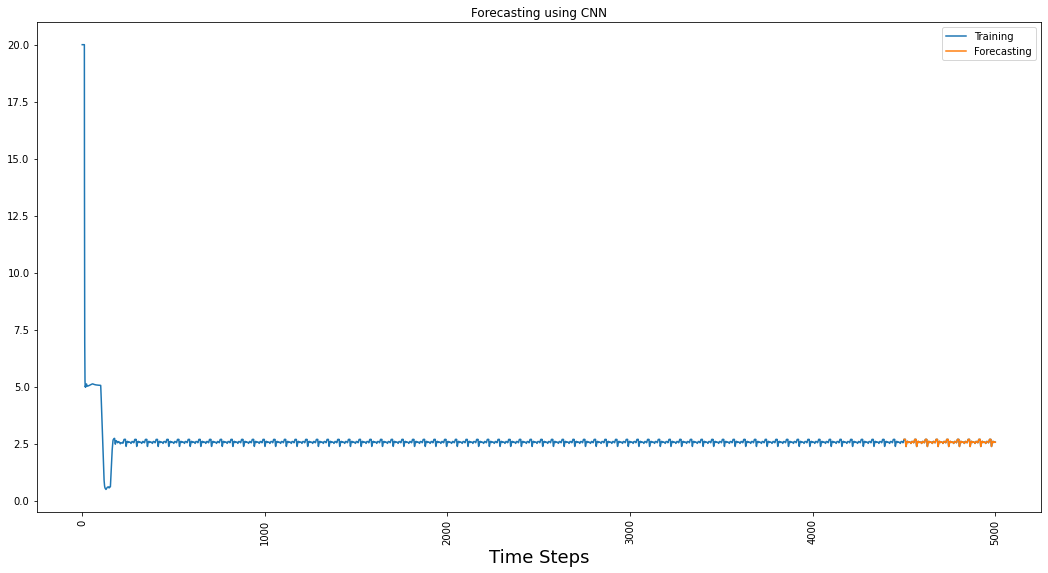

In [105]:
# demonstrate prediction
import math
y_pred=[]
for i in X_test:
    
    x_input = i
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    y_pred.append(float(yhat[0]))

# import numpy as np
# yp = list(np.around(np.array(y_pred),1))
# yt = list(np.around((y_test),1))
    
# y_pred = [ '%.1f' % elem for elem in y_pred ]
# y_test = [ '%.1f' % elem for elem in y_pred ]
    
#print(y_pred)
#print(y_test)

plt.figure(figsize = (18,9))

plt.plot(dates,scaled_dataset,label="Training")
plt.plot(test_date,y_pred,label="Forecasting")
#plt.plot(test_date,y_test,label="actual ")

plt.xticks(rotation=90)
plt.xlabel('Time Steps',fontsize=18)
plt.legend()
plt.title("Forecasting using CNN")
plt.show()

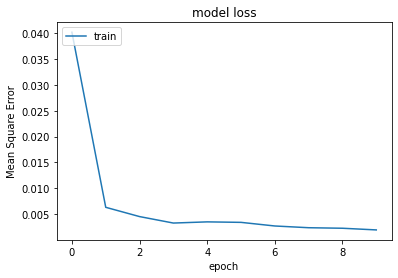

In [107]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Mean Square Error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()